# 5 · A Mecânica do Espectro

**Registro observacional associado ao livro**  
*Descobrindo o Caos nos Números — Como a ordem emerge quando mudamos a forma de observar*  
© Alvaro Costa, 2025  

Este notebook faz parte de uma sequência canônica de registros computacionais.  
Ele não introduz hipóteses, conjecturas ou modelos interpretativos novos.

Seu objetivo é exclusivamente **registrar** o comportamento de estruturas aritméticas sob um regime  
de observação explícito, determinístico e reproduzível.

A leitura conceitual completa encontra-se no livro. Este notebook documenta apenas o experimento  
correspondente.

**Licença:** Creative Commons BY–NC–ND 4.0  
É permitida a leitura, execução e citação.  
Não é permitida a modificação, redistribuição adaptada ou uso comercial independente.

## 1. Recapitulação operacional

Nos capítulos anteriores, foi definido o sinal aritmético

$\Delta_\pi(x) = \pi(x) - 2\pi(\lfloor x/2 \rfloor)$

e foi construído o operador determinístico $M$ a partir de $\Delta_\pi(x)$ e da reescala $\ln(x)$.

Neste notebook, trabalharemos em um regime finito e completamente controlado, fixando $N = 32$  
e o domínio discreto $x \in \{1,2,\dots,32\}$.

O objetivo é executar, de forma explícita:

- a preparação dos dados $\Delta_\pi(x)$ e $\ln(x)$;
- a construção da matriz $M \in \mathbb{R}^{32 \times 32}$;
- o cálculo do espectro de $M$ (autovalores e autovetores).

Nenhuma estatística será calculada neste ponto.  
Nenhuma hipótese será formulada.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Usaremos as funções que já criamos nos capítulos anteriores
def primos_ate(n: int) -> np.ndarray:
    if n < 2: return np.array([], dtype=int)
    sieve = np.ones(n+1, dtype=bool); sieve[:2] = False
    for i in range(2, int(np.sqrt(n))+1):
        if sieve[i]: sieve[i*i:n+1:i] = False
    return np.flatnonzero(sieve)

# Parâmetro do nosso universo de brinquedo
N = 32
primos_geral = primos_ate(N)
x_range = np.arange(1, N + 1)

# --- Bloco de Cálculo Vetorizado ---
pi_cumulative = np.zeros(N + 1, dtype=int)
pi_cumulative[primos_geral] = 1
pi_cumulative = np.cumsum(pi_cumulative)

pi_x_vals = pi_cumulative[x_range]
pi_x_div_2_vals = pi_cumulative[x_range // 2]
delta_pi_vals = pi_x_vals - 2 * pi_x_div_2_vals
# ------------------------------------

# Criação do DataFrame didático
df_32 = pd.DataFrame({
    'x': x_range,
    'π(x)': pi_x_vals,
    'Δπ(x)': delta_pi_vals,
    'ln(x)': np.log(x_range)
})

print("Tabela de dados para o nosso universo N=32:")
display(df_32.T) # .T para transpor e caber melhor na tela

Tabela de dados para o nosso universo N=32:


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
x,1.0,2.000000,3.000000,4.000000,5.000000,6.000000,7.00000,8.000000,9.000000,10.000000,...,23.000000,24.000000,25.000000,26.000000,27.000000,28.000000,29.000000,30.000000,31.000000,32.000000
π(x),0.0,1.000000,2.000000,2.000000,3.000000,3.000000,4.00000,4.000000,4.000000,4.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,10.000000,10.000000,11.000000,11.000000
Δπ(x),0.0,1.000000,2.000000,0.000000,1.000000,-1.000000,0.00000,0.000000,0.000000,-2.000000,...,-1.000000,-1.000000,-1.000000,-3.000000,-3.000000,-3.000000,-2.000000,-2.000000,-1.000000,-1.000000
ln(x),0.0,0.693147,1.098612,1.386294,1.609438,1.791759,1.94591,2.079442,2.197225,2.302585,...,3.135494,3.178054,3.218876,3.258097,3.295837,3.332205,3.367296,3.401197,3.433987,3.465736


## 3. Construção explícita do operador $M$ $(32 \times 32$)

Com os dados de entrada preparados, aplicamos diretamente a definição do operador $M$, conforme introduzida  
no capítulo anterior:

$
M_{i,j}
=
\cos\,\bigl(\Delta_\pi(x_i)\,\ln(x_j)\bigr)
+
\cos\,\bigl(\Delta_\pi(x_j)\,\ln(x_i)\bigr).
$

O código abaixo extrai os vetores $\Delta_\pi(x)$ e $\ln(x)$ da tabela e constrói a matriz real e simétrica  
$M \in \mathbb{R}^{32 \times 32}$.

O mapa de calor permite visualizar a organização interna do operador nesse regime finito.


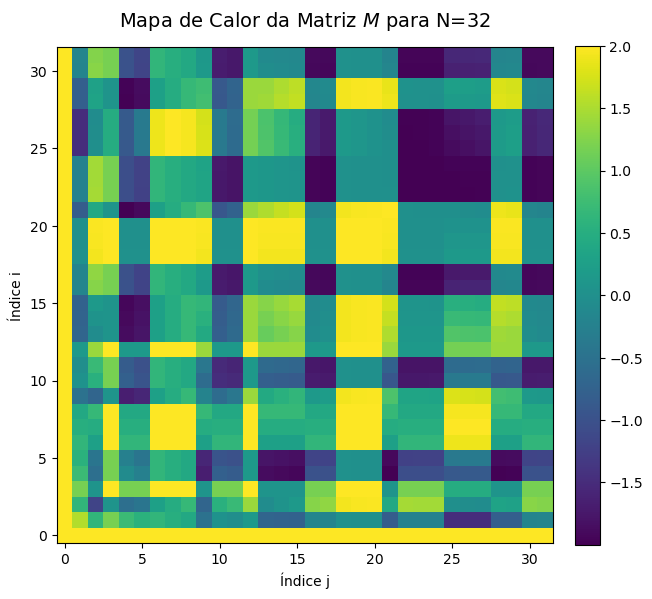

In [2]:
# Extrai os vetores da tabela
delta_pi_vec = df_32['Δπ(x)'].to_numpy()
log_x_vec = df_32['ln(x)'].to_numpy()

# Constrói a matriz M de forma eficiente
C = np.cos(np.outer(delta_pi_vec, log_x_vec))
M_32 = C + C.T

# Visualização da matriz M
plt.style.use('default')
fig, ax = plt.subplots(figsize=(7, 7))
im = ax.imshow(M_32, cmap='viridis', origin='lower')
ax.set_title(r"Mapa de Calor da Matriz $M$ para N=32", fontsize=14, pad=15)
ax.set_xlabel("Índice j")
ax.set_ylabel("Índice i")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.show()

In [3]:
# Cálculo dos autovalores e autovetores
lam, v = np.linalg.eigh(M_32)

print(f"A matriz M de 32x32 possui {len(lam)} autovalores (níveis de energia) reais:")
# Imprime os autovalores arredondados para clareza
print(np.round(lam, 2))


A matriz M de 32x32 possui 32 autovalores (níveis de energia) reais:
[-25.6   -9.51  -5.57  -0.    -0.    -0.    -0.    -0.    -0.    -0.
  -0.    -0.    -0.    -0.    -0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     1.67   5.51
  11.97  26.49]


### O que são autovetores?

Seja $M$ uma matriz real e simétrica.

Um número real $\lambda$ é chamado de autovalor de $M$ se existir um vetor não nulo $v$ tal que:

$
M v = \lambda v.
$

O vetor $v$ correspondente é chamado de autovetor.

No contexto deste notebook, cada autovetor representa um modo espectral do operador $M$, isto é, uma direção do espaço vetorial  
que permanece invariante sob a ação de $M$, a menos de um fator escalar.

Cada autovetor possui $N$ componentes, indexadas pelos valores discretos de $x$.


Cada um dos 32 autovalores tem um autovetor correspondente de N=32 componentes.
Shape da matriz de autovetores 'v': (32, 32) (cada coluna é um autovetor)


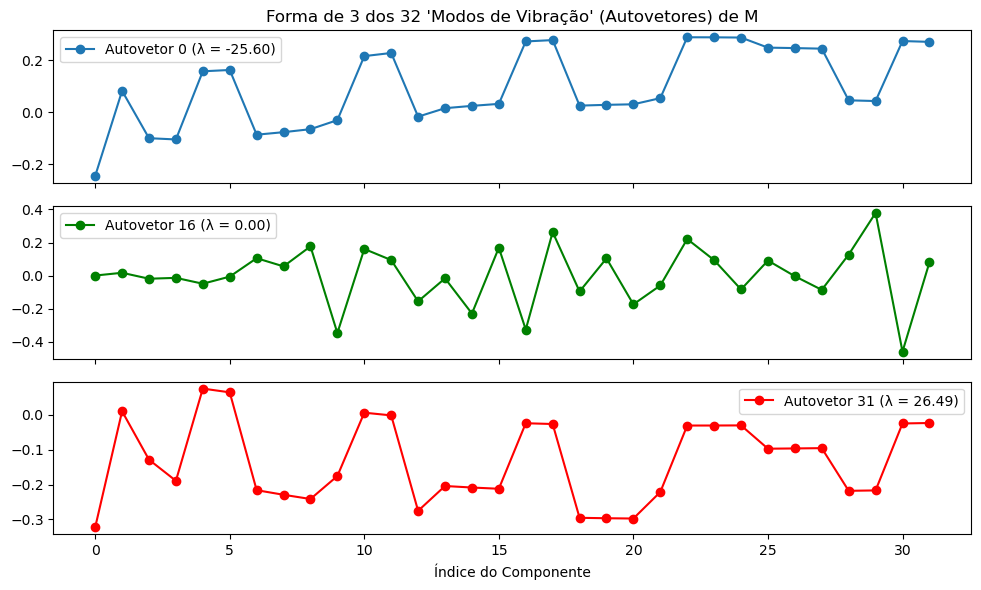

In [4]:
print(f"Cada um dos 32 autovalores tem um autovetor correspondente de N=32 componentes.")
print(f"Shape da matriz de autovetores 'v': {v.shape} (cada coluna é um autovetor)")

# Vamos visualizar a forma de 3 dos 32 modos de vibração
fig, axes = plt.subplots(3, 1, figsize=(10, 6), sharex=True)

# Autovetor do menor autovalor (estado fundamental)
axes[0].plot(v[:, 0], 'o-', label=f"Autovetor 0 (λ = {lam[0]:.2f})")
axes[0].set_title("Forma de 3 dos 32 'Modos de Vibração' (Autovetores) de M")
axes[0].legend()

# Autovetor do meio do espectro
mid_idx = N // 2
axes[1].plot(v[:, mid_idx], 'o-', label=f"Autovetor {mid_idx} (λ = {lam[mid_idx]:.2f})", color='green')
axes[1].legend()

# Autovetor do maior autovalor (estado mais excitado)
axes[2].plot(v[:, -1], 'o-', label=f"Autovetor {N-1} (λ = {lam[-1]:.2f})", color='red')
axes[2].set_xlabel("Índice do Componente")
axes[2].legend()

plt.tight_layout()
plt.show()


## 5. Preparação do regime de observação

Até aqui, o operador $M$ foi construído e analisado em um regime finito, com $N = 32$.

Nesse contexto, foi possível:

- definir formalmente autovalores e autovetores;
- calcular explicitamente o espectro do operador;
- verificar que a decomposição espectral está bem definida.

Este regime não tem como objetivo revelar regularidades estatísticas.  
Ele serve apenas para fixar definições e validar o procedimento.

A questão que orienta os próximos capítulos é a seguinte:

**como o espectro do operador $M$ se comporta quando o domínio é ampliado e quando a escala inicial $X_0$  
é deslocada ao longo da reta numérica?**

Como observado anteriormente, o sinal $\Delta_\pi(x)$ apresenta comportamentos distintos em diferentes escalas.  
Nos próximos capítulos, as ferramentas introduzidas aqui serão aplicadas sistematicamente para medir como o  
espectro de $M$ responde a essas variações.

Nenhuma hipótese será assumida.  
As regularidades, se presentes, serão observadas.
